# 3회차 스터디
 - 2회차 복습
     - 인덱싱
 - 데이터프레임을 이용한 그룹화
 - 시각화

# 라이브러리 임포트 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 1. 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows
# plt.rc('font', family='AppleGothic')  # Mac
# plt.rc('font', family='NanumGothic')  # Linux

# 2. 마이너스(-) 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = True

# 데이터 불러오기

In [4]:
df = pd.read_csv('매출데이터.csv')
df

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
0,2024-03-03,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0,1800,0.00,5400.0,0.28,1512.0
1,2024-03-04,홍대점,P1005,닭가슴살팩,C9831,여,20대,모바일페이,3.0,4000,0.10,10800.0,0.32,3456.0
2,2024-03-07,강남점,P1006,블루베리,C3202,여,50대,모바일페이,4.0,5000,0.15,17000.0,0.40,6800.0
3,2024-03-11,명동점,P1003,저지방 우유,C1239,여,50대,현금,5.0,2200,0.10,9900.0,0.25,2475.0
4,2024-03-11,강남점,P1007,그릭요거트,C9368,남,50대,모바일페이,2.0,3800,0.10,6840.0,0.33,2257.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-02-25,명동점,P1007,그릭요거트,C1896,남,40대,모바일페이,4.0,3800,0.05,14440.0,0.33,4765.2
196,2025-02-26,강남점,P1004,통밀 식빵,C8696,남,50대,카드,4.0,3500,0.00,14000.0,0.28,3920.0
197,2025-02-27,명동점,P1003,저지방 우유,C2047,남,20대,모바일페이,2.0,2200,0.00,4400.0,0.25,1100.0
198,2025-02-28,홍대점,P1008,오트밀,C8563,여,60대,모바일페이,3.0,3200,0.05,9120.0,0.30,2736.0


# 데이터 인덱싱 복습

In [10]:
a = '안녕하세요. 파이썬'
a[2:5]

'하세요'

In [12]:
a = ['가','나','다','라','마','바','사','아','자','차']
a[0],  a[1],  a[2:4],     a[7:1:-2]

('가', '나', ['다', '라'], ['아', '바', '라'])

In [46]:
df.iloc[1:10:2,1:5]

,매장명,상품코드,상품명,고객ID
1,홍대점,P1005,닭가슴살팩,C9831
3,명동점,P1003,저지방 우유,C1239
5,명동점,P1002,유기농 바나나,C4719
7,명동점,P1007,그릭요거트,C9053
9,홍대점,P1002,유기농 바나나,C2468


### 조건에 의한 필터링

| 연산자 | 의미             | 예시                        |
|--------|------------------|-----------------------------|
| `==`   | 같다             | `df['성별'] == '남성'`     |
| `!=`   | 같지 않다        | `df['연령대'] != '30대'`   |
| `>`    | 크다             | `df['단가'] > 3000`         |
| `<`    | 작다             | `df['수량'] < 5`            |
| `&`    | 그리고 (and)     | `(조건1) & (조건2)`        |
| `|`    | 또는 (or)        | `(조건1) | (조건2)`        |
| `()`   | 우선순위 지정    | 꼭 괄호로 감싸야 오류 없음 |



In [14]:
df.loc[0:10:2,'매장명':'수량']

,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량
0,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0
2,강남점,P1006,블루베리,C3202,여,50대,모바일페이,4.0
4,강남점,P1007,그릭요거트,C9368,남,50대,모바일페이,2.0
6,잠실점,P1007,그릭요거트,C8613,남,50대,현금,4.0
8,홍대점,P1001,유기농 사과,C9558,남,60대,모바일페이,4.0
10,홍대점,P1008,오트밀,C6740,여,40대,현금,1.0


In [35]:
df['매장명']

0      명동점
1      홍대점
2      강남점
3      명동점
4      강남점
      ... 
195    명동점
196    강남점
197    명동점
198    홍대점
199    명동점
Name: 매장명, Length: 200, dtype: object

In [39]:
df[df['매장명'] == '명동점']  #.head(5)

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
0,2024-03-03,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0,1800,0.0,5400.0,0.28,1512.0
3,2024-03-11,명동점,P1003,저지방 우유,C1239,여,50대,현금,5.0,2200,0.1,9900.0,0.25,2475.0
5,2024-03-12,명동점,P1002,유기농 바나나,C4719,남,40대,모바일페이,3.0,3000,0.1,8100.0,0.35,2835.0
7,2024-03-14,명동점,P1007,그릭요거트,C9053,여,20대,카드,4.0,3800,0.1,13680.0,0.33,4514.4
11,2024-03-17,명동점,P1007,그릭요거트,C8095,여,40대,카드,1.0,3800,0.0,3800.0,0.33,1254.0


In [86]:
cond1 = df['결제수단'] == '모바일페이'
cond2 = df['연령대'] == '20대'
cond3 = df['수량'] >= 4 
df[cond1 & cond2 & cond3].to_csv('result1.csv')

In [53]:
df.loc[df['수량'] >= 5].shape

(37, 14)

In [ ]:
df[조건1 & 조건2 & ...]

In [55]:
df.loc[(df['수량'] >= 5) & (df['단가'] < 3000)]

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
3,2024-03-11,명동점,P1003,저지방 우유,C1239,여,50대,현금,5.0,2200,0.10,9900.0,0.25,2475.0
20,2024-04-03,홍대점,P1009,유기농 당근,C1819,남,30대,현금,5.0,1800,0.00,9000.0,0.28,2520.0
37,2024-05-08,명동점,P1009,유기농 당근,C9660,여,20대,현금,5.0,1800,0.15,7650.0,0.28,2142.0
40,2024-05-15,강남점,P1001,유기농 사과,C7255,남,40대,현금,5.0,2500,0.15,10625.0,0.30,3187.5
44,2024-05-25,명동점,P1001,유기농 사과,C4070,여,40대,모바일페이,5.0,2500,0.05,11875.0,0.30,3562.5
55,2024-06-16,명동점,P1003,저지방 우유,C4767,남,60대,모바일페이,5.0,2200,0.05,10450.0,0.25,2612.5
87,2024-08-12,홍대점,P1009,유기농 당근,C7800,여,30대,모바일페이,5.0,1800,0.10,8100.0,0.28,2268.0
107,2024-09-15,홍대점,P1009,유기농 당근,C8465,여,40대,카드,5.0,1800,0.15,7650.0,0.28,2142.0
121,2024-10-13,명동점,P1009,유기농 당근,C3771,여,50대,카드,5.0,1800,0.15,7650.0,0.28,2142.0
125,2024-10-22,강남점,P1003,저지방 우유,C9119,여,50대,모바일페이,5.0,2200,0.15,9350.0,0.25,2337.5


In [90]:
con1 = df['할인율'] == 0.1
con2 = df['상품명'] == '닭가슴살팩'
con3 = df['매출액'] >= 4000
df.loc[con1 & con2 & con3,
    ['거래일자', '상품명', '고객ID', '수량', '단가', '매출액']
]  # 3 조건을 모두 만족

,거래일자,상품명,고객ID,수량,단가,매출액
1,2024-03-04,닭가슴살팩,C9831,3.0,4000,10800.0
50,2024-06-06,닭가슴살팩,C9636,3.0,4000,10800.0
51,2024-06-09,닭가슴살팩,C0220,4.0,4000,14400.0


# 데이터 그룹화

- 데이터 그룹화란?
  - 1. 데이터를
    2. 특정 기준에 따라 묶고
    3. 각 그룹별로 요약, 집계 연산을 수행하는 것
  - 비슷한 속성을 가진 데이터끼리 통계값(합계, 평균, 개수 등)을 계산하는 것
  - (tip) 엑셀 피벗은 데이터 그룹화의 일종.

In [97]:
df.head(3)  # df.columns

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
0,2024-03-03,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0,1800,0.00,5400.0,0.28,1512.0
1,2024-03-04,홍대점,P1005,닭가슴살팩,C9831,여,20대,모바일페이,3.0,4000,0.10,10800.0,0.32,3456.0
2,2024-03-07,강남점,P1006,블루베리,C3202,여,50대,모바일페이,4.0,5000,0.15,17000.0,0.40,6800.0


In [159]:
result = df.groupby(['매장명', '성별'])['매출액'].sum().reset_index()

In [174]:
df.groupby('매장명').describe()

수량                                                 단가               \
    count      mean       std  min  25%  50%  75%  max count         mean   
매장명                                                                         
강남점  44.0  2.886364  1.466144  1.0  2.0  3.0  4.0  5.0  44.0  3122.727273   
명동점  51.0  3.039216  1.341056  1.0  2.0  3.0  4.0  5.0  51.0  3052.941176   
잠실점  44.0  3.113636  1.417760  1.0  2.0  3.0  4.0  5.0  44.0  3131.818182   
홍대점  59.0  3.067797  1.387933  1.0  2.0  3.0  4.0  5.0  61.0  3191.803279   

     ...   마진율        마진액                                                     \
     ...   75%  max count         mean          std    min      25%      50%   
매장명  ...                                                                       
강남점  ...  0.33  0.4  44.0  2599.279545  1595.419849  428.4  1216.00  2297.35   
명동점  ...  0.34  0.4  51.0  2664.547059  1623.385728  637.5  1457.25  2142.00   
잠실점  ...  0.33  0.4  43.0  3033.425581  2422.434352  550.0  1238.25  2000.00   
홍대점  ...  0.33  0.4  58.0  2947.660345  1918.961258  428.4  1436.40  2484.00   

                      
         75%     max  
매장명                   
강남점  3753.00  6800.0  
명동점  3509.25  7600.0  
잠실점  4613.85  9500.0  
홍대점  4095.00  8500.0  

[4 rows x 48 columns]

In [159]:
df.groupby('매장명')['수량'].agg(['count', 'sum', 'mean'])

,count,sum,mean
매장명,,,
강남점,44,127.0,2.886364
명동점,51,155.0,3.039216
잠실점,44,137.0,3.113636
홍대점,59,181.0,3.067797


In [163]:
df.groupby('매장명')['매출액'].agg(['sum', 'max'])

,sum,max
매장명,,
강남점,368615.0,17500.0
명동점,429175.0,19000.0
잠실점,391790.0,23750.0
홍대점,519740.0,21250.0


- agg를 이용한 데이터 그룹화

In [9]:
df.groupby('소속')['매출'].sum()

매장명
강남점    368615.0
명동점    429175.0
잠실점    391790.0
홍대점    519740.0
Name: 매출액, dtype: float64

In [207]:
df.groupby(['매장명', '성별']).agg(
    고객수 = ('고객ID','nunique'),
    구매상품종류 = ('상품코드','nunique'),
    총수량 = ('수량','sum'),
    총매출 = ('매출액','sum'),
    총마진 = ('마진액','sum')
)

고객수  구매상품종류   총수량       총매출      총마진
매장명 성별                                      
강남점 남    20       9  49.0  144565.0  44615.9
    여    24       9  78.0  224050.0  69752.4
명동점 남    26       8  73.0  216545.0  70621.6
    여    25       9  82.0  212630.0  65270.3
잠실점 남    18       6  62.0  177245.0  59524.6
    여    25       9  75.0  214545.0  70912.7
홍대점 남    30       9  82.0  257930.0  88479.1
    여    30       9  99.0  261810.0  82485.2

In [203]:
df.columns

Index(['거래일자', '매장명', '상품코드', '상품명', '고객ID', '성별', '연령대', '결제수단', '수량', '단가',
       '할인율', '매출액', '마진율', '마진액'],
      dtype='object')

In [192]:
df.groupby(['매장명', '성별']).agg(
    판매수량=('수량', 'sum'),
    총매출=('매출액', 'sum'),
    고객수=('고객ID', 'nunique'),
    평균구매수량=('수량', 'mean'),
    구매상품종류=('상품코드', 'nunique')
)

판매수량       총매출  고객수    평균구매수량  구매상품종류
매장명 성별                                       
강남점 남   49.0  144565.0   20  2.450000       9
    여   78.0  224050.0   24  3.250000       9
명동점 남   73.0  216545.0   26  2.807692       8
    여   82.0  212630.0   25  3.280000       9
잠실점 남   62.0  177245.0   18  3.263158       6
    여   75.0  214545.0   25  3.000000       9
홍대점 남   82.0  257930.0   30  2.928571       9
    여   99.0  261810.0   30  3.193548       9

- pandas의 groupby
| 기능            | 함수명     |      | 기능            | 함수명     |
|-----------------|------------|------|-----------------|------------|
| 평균            | `mean`     |      | 표준편차        | `std`      |
| 합계            | `sum`      |      | 분산            | `var`      |
| 최소값          | `min`      |      | 중앙값          | `median`   |
| 최대값          | `max`      |      | 첫 번째 값      | `first`    |
| 갯수            | `count`    |      | 마지막 값       | `last`     |
| 고유한 값의 수  | `nunique`  |      | 최빈값          | `mode`     |
| 곱              | `prod`     |      | 평균 절대 편차  | `mad`      |
| 표준 오차      | `sem`      |      |         |        |
 

#### lambda식
- 그룹바이에서 사용하는 사례
    - 다른 컬럼과 연동: 최대값을 추출하고, 해당하는 다른 컬럼의 값를 반환
    - 문자열/리스트 처리: 그룹별로 해당하는 리스트를 반환
    - 그 외 기타 등

##### 다른 컬럼과 연동

In [47]:
# 다른 컬럼과 연동
## 최대값을 추출하고 → 해당하는 고객ID를 반환
df.groupby('매장명').agg(
    최대고객 = ('매출액', lambda x: df.loc[x.idxmax(), '고객ID'])
)

,최대고객
매장명,
강남점,C3466
명동점,C7205
잠실점,C7087
홍대점,C8872


In [51]:
# 검증
df.groupby('매장명').agg(
    최대고객 = ('매출액', lambda x: df.loc[x.idxmax(), '고객ID']),
    최대매출 = ('매출액', 'max'),
    index    = ('매출액', lambda x: x.idxmax())
)

,최대고객,최대매출,index
매장명,,,
강남점,C3466,17500.0,140
명동점,C7205,19000.0,70
잠실점,C7087,23750.0,71
홍대점,C8872,21250.0,104


In [38]:
# 인덱스 no 140이 실제 C3466 고객이 맞는지 확인
df[df.index== 140]

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
140,2024-11-22,강남점,P1004,통밀 식빵,C3466,여,30대,모바일페이,5.0,3500,0.0,17500.0,0.28,4900.0


##### 그룹별 문자열 리스트 출력

In [215]:
df.groupby("매장명")["상품명"].agg(
    상품목록 = lambda x: ", ".join(sorted(x.unique()))
)

,상품목록
매장명,
강남점,"그릭요거트, 닭가슴살팩, 블루베리, 오트밀, 유기농 당근, 유기농 바나나, 유기농 ..."
명동점,"그릭요거트, 닭가슴살팩, 블루베리, 오트밀, 유기농 당근, 유기농 바나나, 유기농 ..."
잠실점,"그릭요거트, 닭가슴살팩, 블루베리, 오트밀, 유기농 당근, 유기농 바나나, 유기농 ..."
홍대점,"그릭요거트, 닭가슴살팩, 블루베리, 오트밀, 유기농 당근, 유기농 바나나, 유기농 ..."


# for문
 - 리스트나 범위를 이용하여 반복동작을 수행하는 문법

In [13]:
# 구구단
for i in range(2,10):
    for j in range(1,10):
        print(f'{i} * {j} = {i*j}')

2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10
2 * 6 = 12
2 * 7 = 14
2 * 8 = 16
2 * 9 = 18


In [32]:
df

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
0,2024-03-03,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0,1800,0.00,5400.0,0.28,1512.0
1,2024-03-04,홍대점,P1005,닭가슴살팩,C9831,여,20대,모바일페이,3.0,4000,0.10,10800.0,0.32,3456.0
2,2024-03-07,강남점,P1006,블루베리,C3202,여,50대,모바일페이,4.0,5000,0.15,17000.0,0.40,6800.0
3,2024-03-11,명동점,P1003,저지방 우유,C1239,여,50대,현금,5.0,2200,0.10,9900.0,0.25,2475.0
4,2024-03-11,강남점,P1007,그릭요거트,C9368,남,50대,모바일페이,2.0,3800,0.10,6840.0,0.33,2257.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-02-25,명동점,P1007,그릭요거트,C1896,남,40대,모바일페이,4.0,3800,0.05,14440.0,0.33,4765.2
196,2025-02-26,강남점,P1004,통밀 식빵,C8696,남,50대,카드,4.0,3500,0.00,14000.0,0.28,3920.0
197,2025-02-27,명동점,P1003,저지방 우유,C2047,남,20대,모바일페이,2.0,2200,0.00,4400.0,0.25,1100.0
198,2025-02-28,홍대점,P1008,오트밀,C8563,여,60대,모바일페이,3.0,3200,0.05,9120.0,0.30,2736.0


In [60]:
# df에서 그룹별 특성 추출
store_lst = df['매장명'].unique()

for 매장 in store_lst:
    cond = df['매장명'] == 매장
    temp = df[cond].groupby('연령대').agg(
        총매출 = ('매출액','sum')
    )
    temp.columns = [f'{매장}_총매출']
    display(temp)

,명동점_총매출
연령대,
20대,84970.0
30대,93125.0
40대,91515.0
50대,84490.0
60대,57075.0


# if문
 - 조건에 따라 동작을 달리하는 문법

In [67]:
score = 85

if score >= 90:
    print("A 학점")
elif score >= 80:
    print("B 학점")
else:
    print("C 학점 이하")

B 학점


# 데이터 시각화

주요 참고자료
 - www.data-to-viz.com
 - matplotlib
 - seaborn

In [ ]:
#라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

In [219]:
import seaborn as sns

In [221]:
df = sns.load_dataset('iris')

In [227]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [235]:
# EDA - (탐색)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [231]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\pooko\anaconda3\envs\bibiml\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\pooko\anaconda3\envs\bibiml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\pooko\anaconda3\envs\bibiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


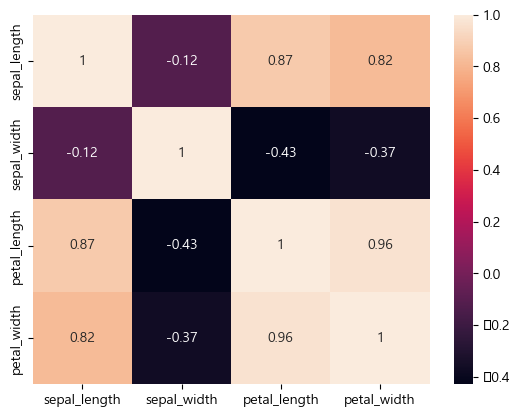

In [285]:
corr = df.iloc[:,0:4].corr()
sns.heatmap(corr, annot=True)

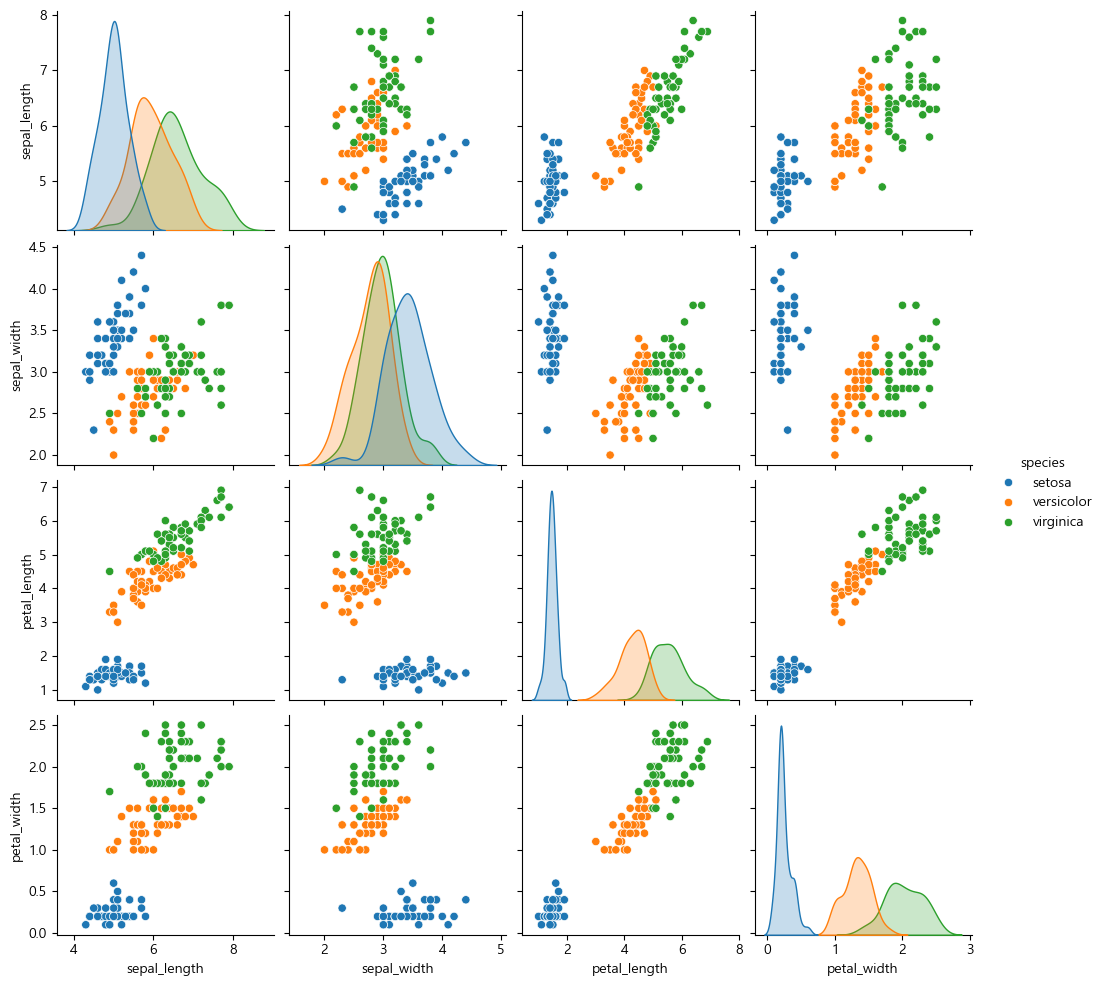

In [237]:
sns.pairplot(df, hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

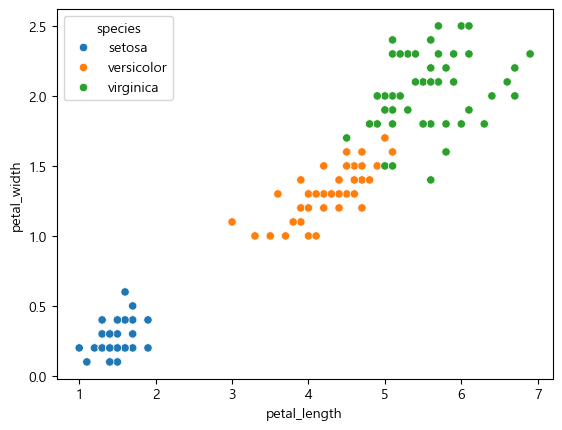

In [245]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

<Axes: >

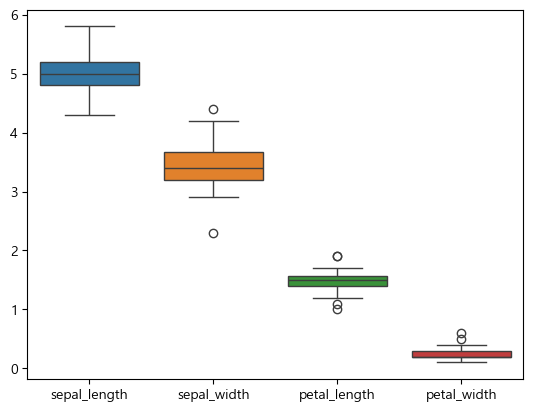

In [265]:
setosa = df[df['species'] == 'setosa']
sns.boxplot(setosa)

<Axes: >

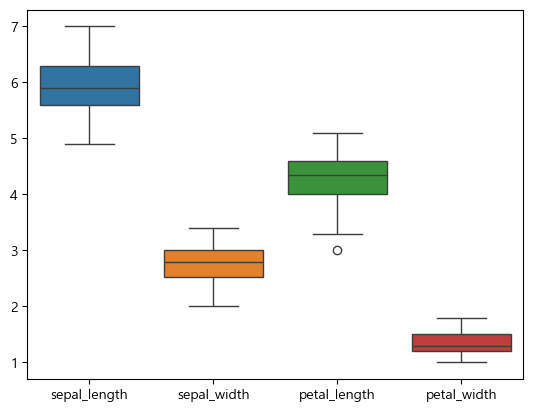

In [267]:
setosa = df[df['species'] == 'versicolor']
sns.boxplot(setosa)

Text(0.5, 1.0, 'test')

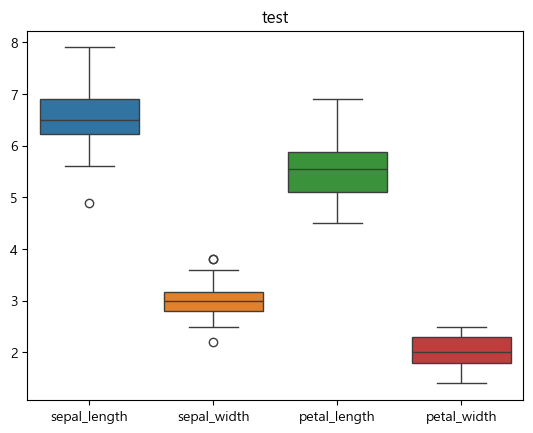

In [271]:
setosa = df[df['species'] == 'virginica']
sns.boxplot(setosa)
plt.title('test')

In [257]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: >

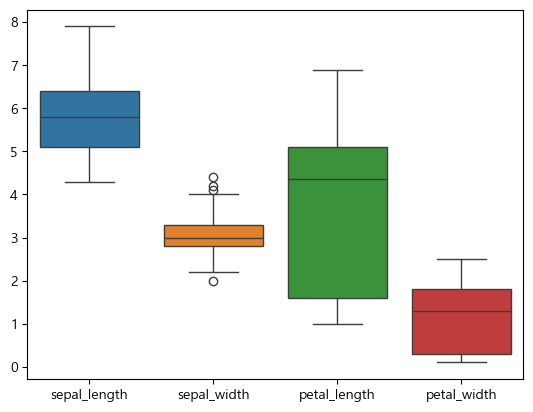

In [251]:
sns.boxplot(df)

In [253]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [239]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.groupby('cols').a

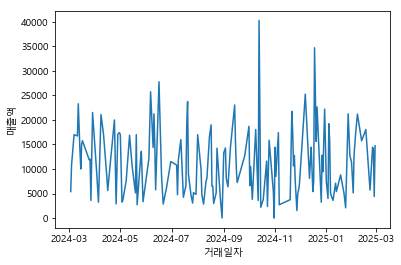

In [247]:
#연간 매출액 데이터
data = df.groupby('거래일자')['매출액'].sum().reset_index()
data['거래일자'] = pd.to_datetime(data['거래일자'])
sns.lineplot(data=data, x="거래일자", y="매출액")

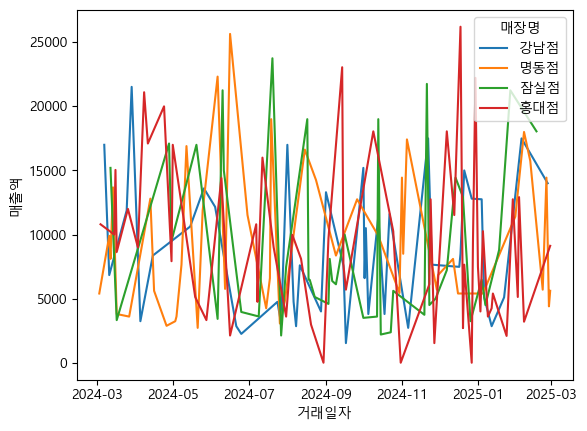

In [126]:
#연간 매출액 데이터
data = df.groupby(['매장명','거래일자'])['매출액'].sum().reset_index()
data['거래일자'] = pd.to_datetime(data['거래일자'])
# plt.figure(figsize=(16,9))
sns.lineplot(data=data, x="거래일자", y="매출액", hue='매장명')
plt.show()

<Axes: xlabel='상품명'>

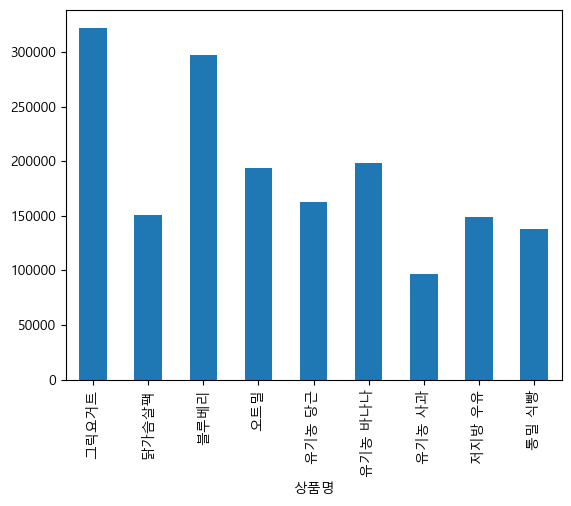

In [201]:
df.groupby('상품명')['매출액'].sum().sort_index().plot(kind='bar')

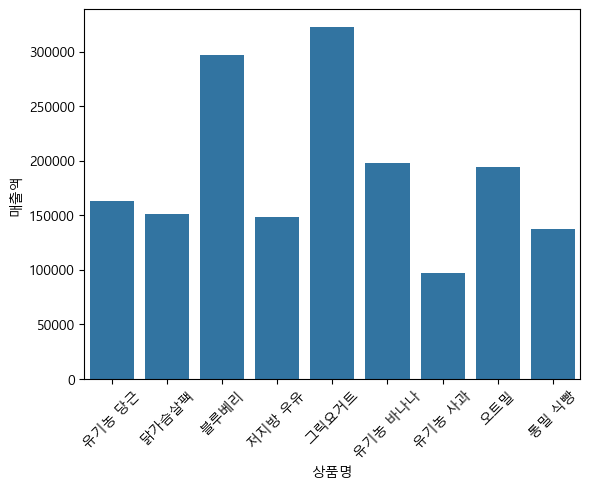

In [197]:
sns.barplot(data=df, x='상품명', y='매출액', estimator=sum, errorbar=None)
plt.xticks(rotation=45);

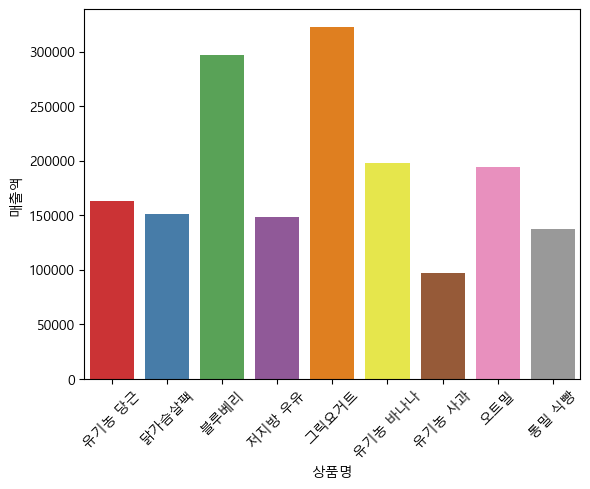

In [168]:
# 범주별 막대그래프
# plt.figure(figsize=(16,9))
sns.barplot(data=df, x='상품명', y='매출액', estimator=sum, errorbar=None);
plt.xticks(rotation=45);

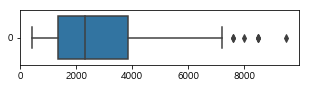

In [315]:
# 박스플롯
plt.figure(figsize = (5,1))
_ = sns.boxplot(data = df['마진액'], orient = 'h')

<Axes: >

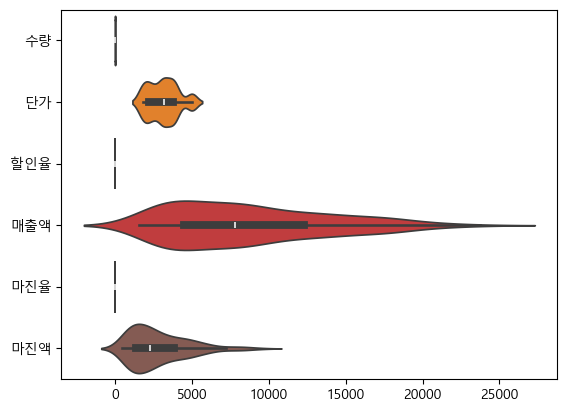

In [17]:
# 히스토그램
sns.violinplot(df, orient='h')

In [23]:
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   거래일자    200 non-null    object 
 1   매장명     200 non-null    object 
 2   상품코드    200 non-null    object 
 3   상품명     200 non-null    object 
 4   고객ID    198 non-null    object 
 5   성별      200 non-null    object 
 6   연령대     198 non-null    object 
 7   결제수단    200 non-null    object 
 8   수량      198 non-null    float64
 9   단가      200 non-null    int64  
 10  할인율     198 non-null    float64
 11  매출액     196 non-null    float64
 12  마진율     200 non-null    float64
 13  마진액     196 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 22.0+ KB


In [279]:
df.iloc[:,0:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


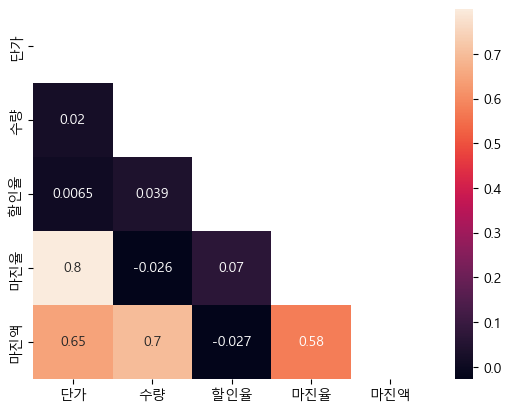

In [25]:
corr = df[['단가','수량','할인율','마진율','마진액']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, annot=True)

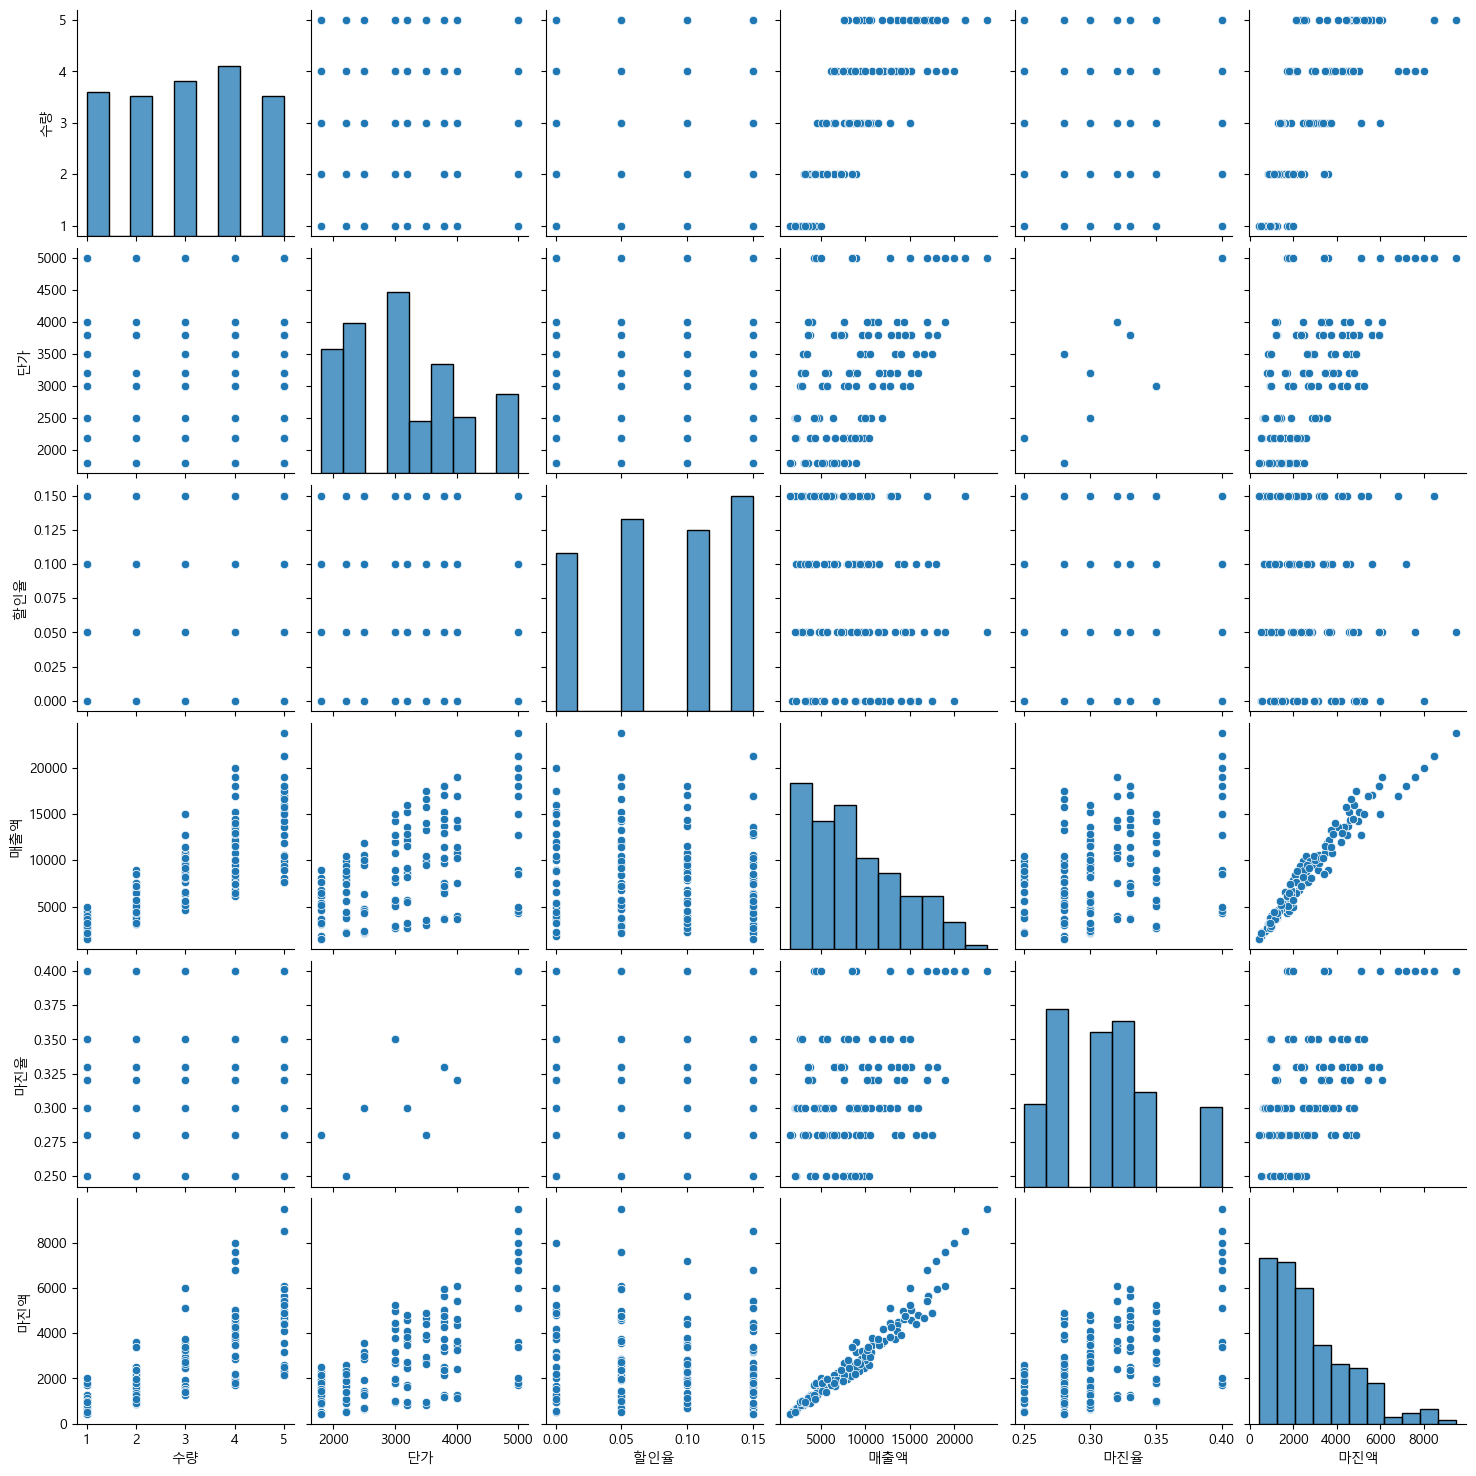

In [27]:
# 페어플롯
sns.pairplot(df)

In [13]:
import seaborn as sns

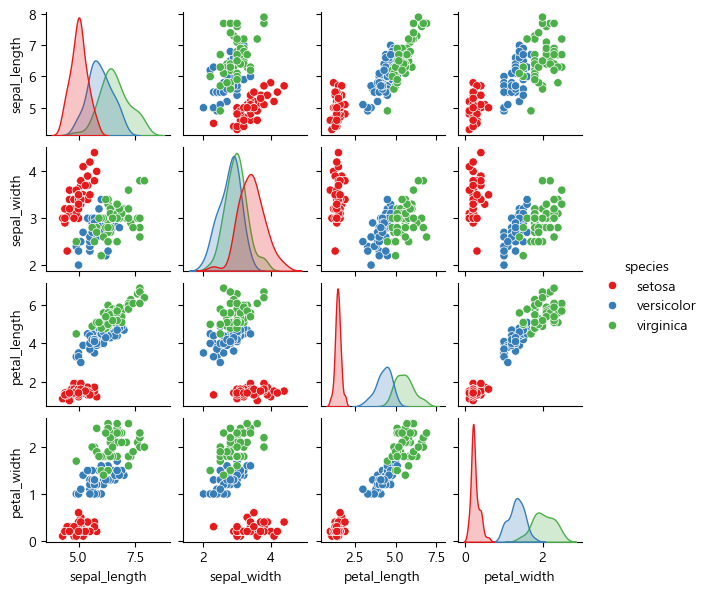

In [43]:
df = sns.load_dataset('iris')
sns.pairplot(df, hue='species', palette = 'Set1', height=1.5, aspect=1)
plt.show()

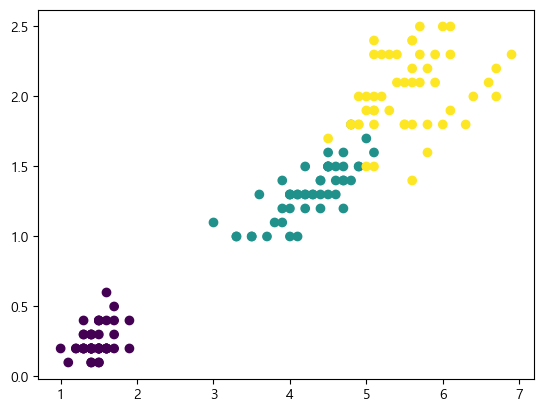

In [51]:
# matplotlib 사용한 시각화
target = pd.Categorical(df['species']).codes
plt.scatter(df['petal_length'], df['petal_width'], c=target)

<Axes: xlabel='petal_length', ylabel='petal_width'>

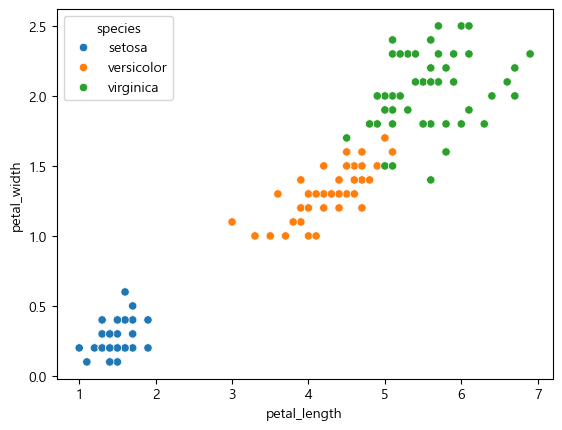

In [74]:
sns.scatterplot(data=df, x='petal_length', y='petal_width' , hue='species')

| 구분   | `plt` 방식                                                                 | `ax` 방식                                                                 |
|--------|----------------------------------------------------------------------------|----------------------------------------------------------------------------|
| 적용 대상 | 현재 활성 Axes (자동 선택)                                                   | 지정한 ax 객체                                                               |
| 메서드   | `plt.title`, `plt.xlabel`, `plt.ylabel`                                   | `ax.set_title`, `ax.set_xlabel`, `ax.set_ylabel`                           |
| 장점   | 코드 짧음, 빠르게 그림                                                         | 명확함, 여러 subplot 관리 쉬움                                                  |
| 권장   | 단일 그래프 그릴 때                                                            | 여러 그래프(서브플롯) 다룰 때                                                    |
| 예시 코드 | import matplotlib.pyplot as plt<br><br>plt.plot([1,2,3],[1,4,9])<br>plt.title("plt 방식")<br>plt.xlabel("X축")<br>plt.ylabel("Y축")<br>plt.show() | import matplotlib.pyplot as plt<br><br>fig, ax = plt.subplots()<br>ax.plot([1,2,3],[1,4,9])<br>ax.set_title("ax 방식")<br>ax.set_xlabel("X축")<br>ax.set_ylabel("Y축")<br>plt.show() |


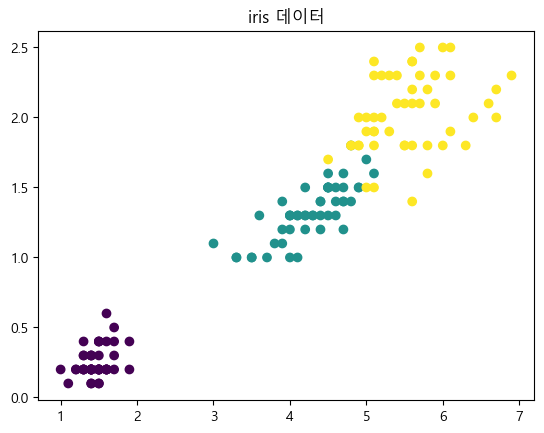

In [114]:
target = pd.Categorical(df['species']).codes

fig, ax = plt.subplots()
ax.scatter(df['petal_length'], df['petal_width'], c=target)
ax.set_title('iris 데이터')
plt.show()